# Case Study 
## The annual Percentage Rate of Interest Charged on New-Car Loans at Nine of the 					Largest Banks in Six American Cities is provided and It is believed that the mean interest rate is same across the six american cities.  Conduct the hypothesis test and provide your inference


Use level of significance $\alpha$ = 0.05

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rate=pd.read_csv('car_insurance_rate.csv', sep='\t')

In [4]:
rate

,Atlanta,Chicago,Houston,Memphis,New York,Philadelphia
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [5]:
rate.describe()

,Atlanta,Chicago,Houston,Memphis,New York,Philadelphia
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,13.194444,12.611111,13.306667,13.244444,13.483333,12.200000
std,0.446825,0.710096,0.556350,0.967007,0.718940,0.504356
min,12.500000,11.900000,12.500000,11.890000,12.450000,11.900000
25%,13.000000,12.300000,13.000000,12.500000,13.000000,12.000000
50%,13.000000,12.500000,13.500000,13.250000,13.750000,12.000000
75%,13.500000,12.750000,13.510000,13.750000,14.000000,12.250000
max,13.750000,14.250000,14.000000,15.000000,14.500000,13.500000


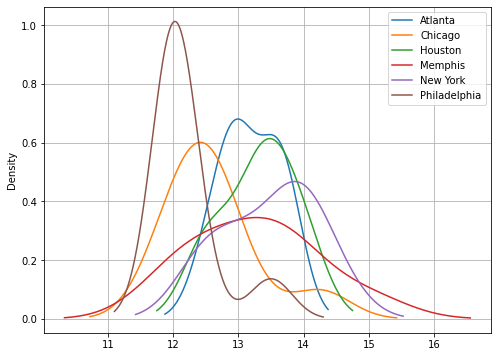

In [6]:
plt.figure(figsize=(8,6))
for i in rate.columns:
    rate[i].plot(kind='kde')
    plt.legend()
    plt.grid()
plt.show()

In [7]:
rate_melt=rate.melt(var_name='city') # using melt will reshape the dataframe and make it suitable for ols model

# 1. Postulate the Null and Alternate Hypothesis

$H_0$: The mean interest rate in all six american cities is same

$H_1$: The mean interest rate is different in atleast one of the six american cities



### for additional understanding 

In [8]:
rate.shape

(9, 6)

In [9]:
n=rate.shape[0]*rate.shape[1] #total no of observations
k=rate.shape[1] #no of groups

In [10]:
#Degree of freedom between groups
dfb=k-1
print('Degree of Freedom between groups',dfb)
#Degree of freedom within groups
dfw=n-k
print('Degree of Freedom within groups',dfw)

Degree of Freedom between groups 5
Degree of Freedom within groups 48


# 2. Perform the analysis of variances test on the dataset

In [11]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [12]:
formula = 'value~city'
model = ols(formula, rate_melt).fit()
aov_table = anova_lm(model)
print(aov_table)

            df     sum_sq   mean_sq         F    PR(>F)
city       5.0  10.945667  2.189133  4.829385  0.001175
Residual  48.0  21.758133  0.453294       NaN       NaN
